In [80]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [17]:
df = pd.read_csv('homeprices.csv')
df = df.drop('age', axis='columns')

array([[550000],
       [565000],
       [610000],
       [595000],
       [760000],
       [810000]], dtype=int64)

In [18]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_Y, test_size=0.2, random_state=25)

In [95]:
import numpy as np
np.ones(2)

ar = np.array([[1, 100], [2, 200], [3, 300]])
loss = np.dot(np.ones(2),np.transpose(ar)) - [100, 200, 300]
# np.meannp.array([[1],[2],[3]])**2
z =np.ones(shape=(2))
z.T
y_train



1    5.65
3    5.95
2    6.10
4    7.60
Name: price, dtype: float64

In [70]:
def batch_gradient_descent(X, y, epochs=10, learning_rate=0.01):
    weights = np.ones(shape=(X.shape[1]))
    bias = 0
    epoch_list = []
    loss_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(weights, X.T) + bias 
        
        loss = np.mean((y_predicted - y)**2)

        weights = weights -  learning_rate * np.mean(np.dot(X.T, (y - y_predicted)))
        bias = bias -  learning_rate*np.mean(y-y_predicted)

        if i%10==0:
            epoch_list.append(i)
            loss_list.append(loss)
            # print('Epoch: ', i, 'loss: ', loss, 'weights: ', weights, 'bias: ', bias)
        
    return weights, bias, epoch_list, loss_list

w, b, epoch_list, loss_list = batch_gradient_descent(X_train, y_train, epochs=100, learning_rate=.01)   #Scaling problem 


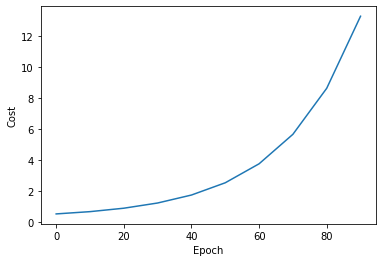

In [71]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_list, loss_list)

In [75]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_train,y_train.reshape(y_train.shape[0],),5000)
w, b, cost

(array([0.7368647 , 0.44008058]), -0.2101987343459549, 0.010014874207211437)

array([0.05769231, 0.17307692, 0.23076923, 0.80769231])

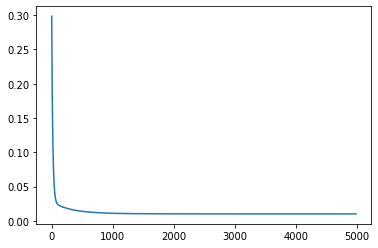

In [78]:
plt.plot(epoch_list, cost_list)


In [ ]:
df[['age', 'affordibility']]


In [5]:
import pandas as pd
df = pd.read_csv('insurance_data.csv')
df[['age', 'affordibility']]

,age,affordibility
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,0
8,62,1
9,61,1
